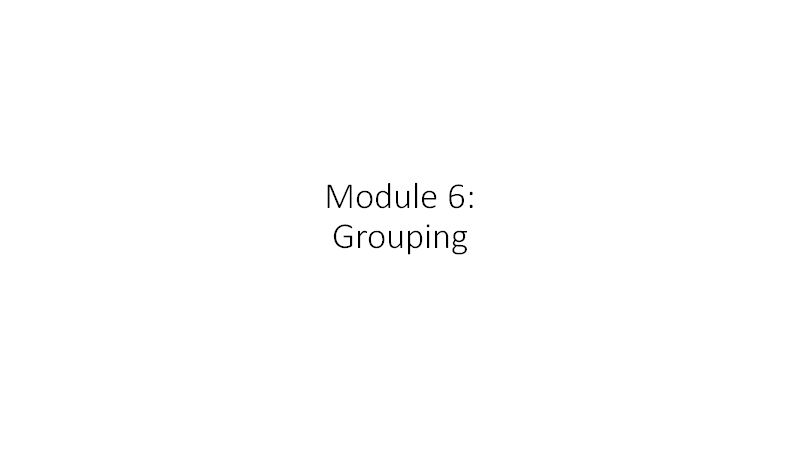

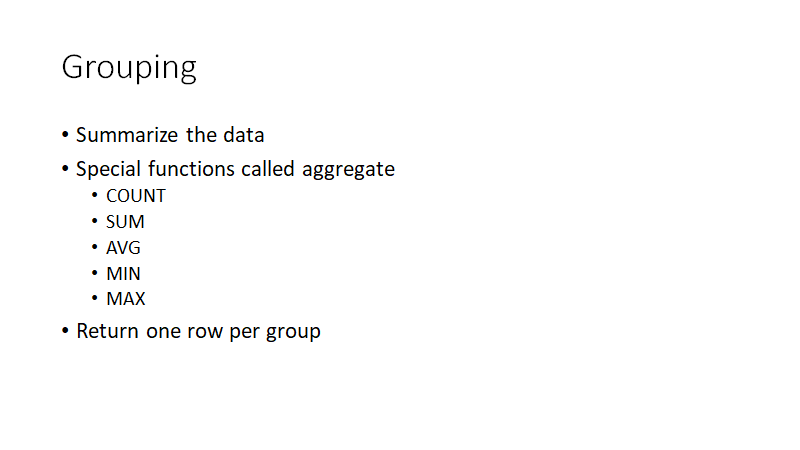

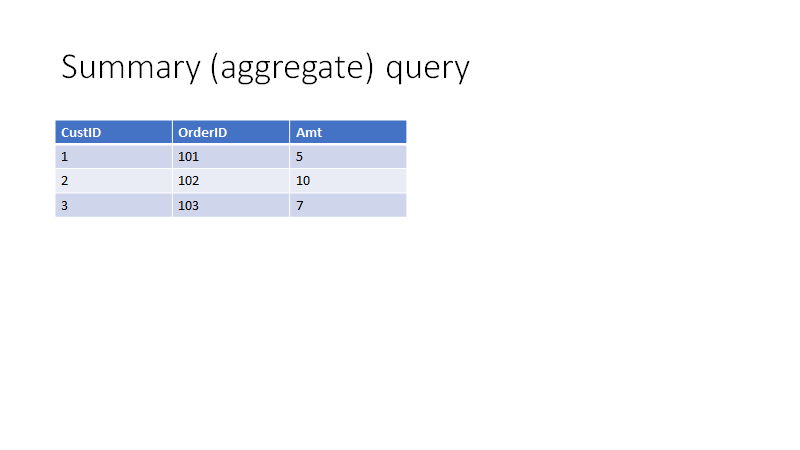

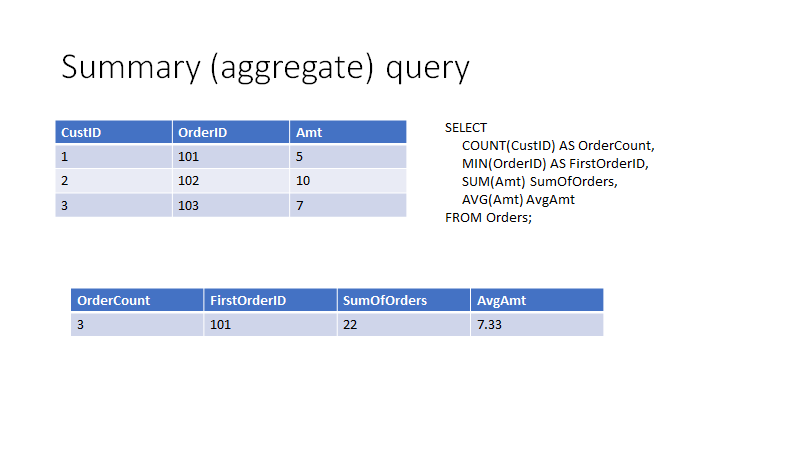

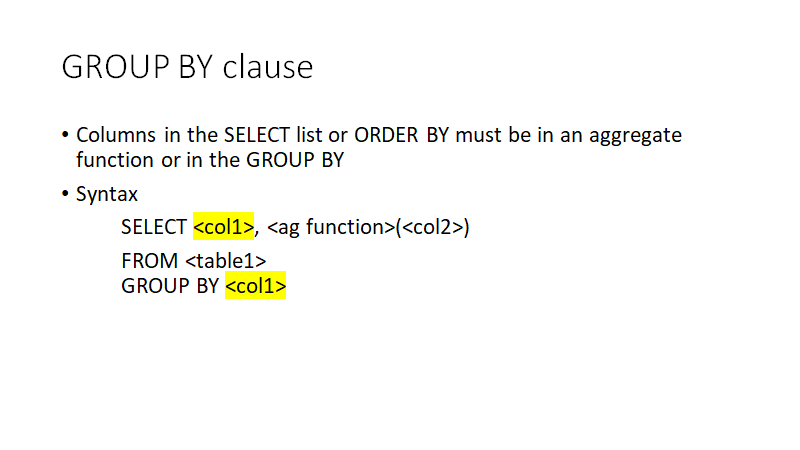

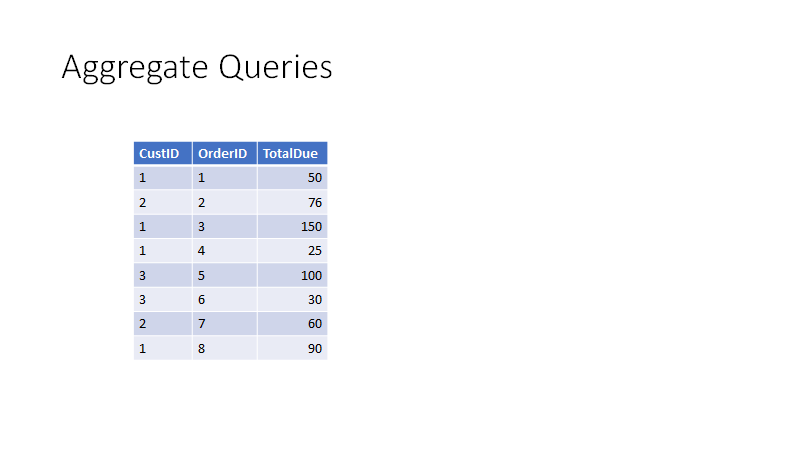

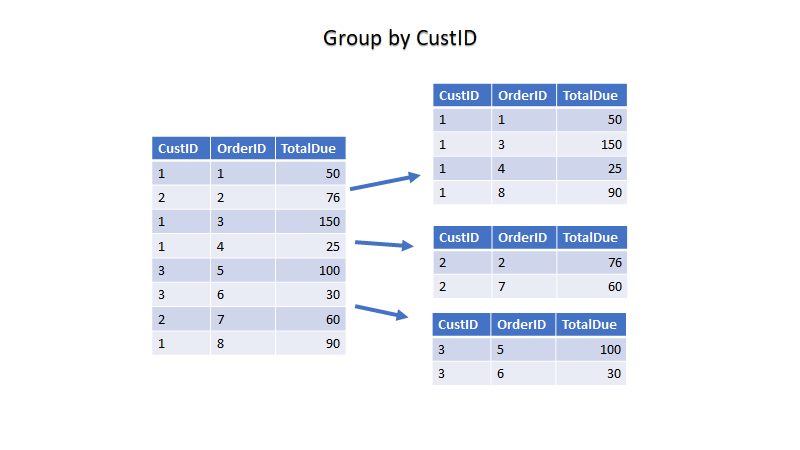

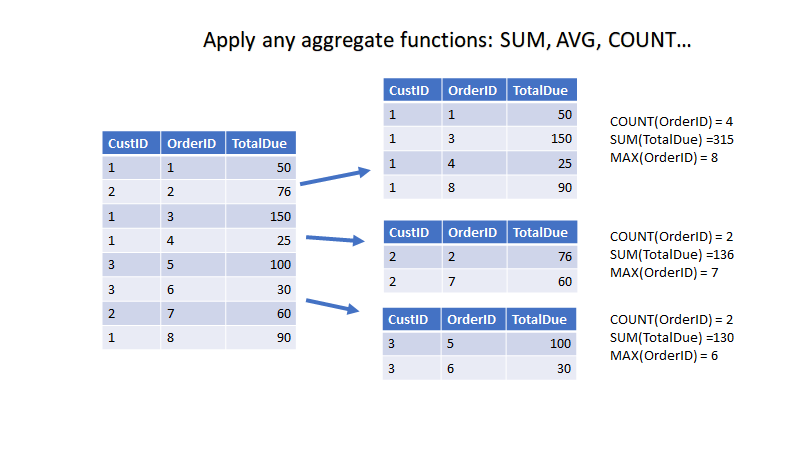

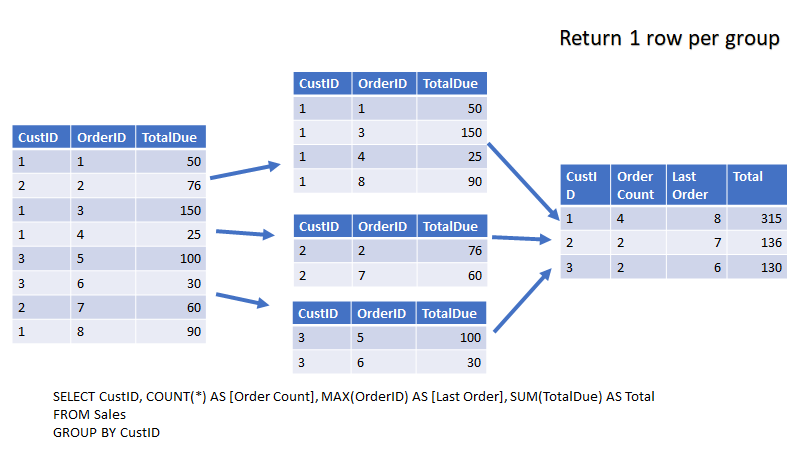

In [ ]:
--Module 6
--Demo 1 Using Aggregate Functions 
SELECT COUNT(*) AS CountOfRows,        
	MAX(TotalDue) AS MaxTotal,        
	MIN(TotalDue) AS MinTotal,        
	SUM(TotalDue) AS SumOfTotal,        
	AVG(TotalDue) AS AvgTotal    
FROM Sales.SalesOrderHeader;  

In [ ]:
--You can also use MIN and MAX on dates and strings    
SELECT MIN(Name) AS MinName,        
	MAX(Name) AS MaxName,        
	MIN(SellStartDate) AS MinSellStartDate    
FROM Production.Product;  

In [ ]:
--What's the difference in these?    
SELECT COUNT(*) AS CountOfRows,        
	COUNT(Color) AS CountOfColor,            
	COUNT(DISTINCT Color) AS CountOfDistinctColor    
FROM Production.Product;  

In [ ]:
--Will fail
SELECT CustomerID,SUM(TotalDue) AS TotalPerCustomer    
FROM Sales.SalesOrderHeader;  

In [ ]:
 --Using the GROUP BY Clause       
SELECT CustomerID,SUM(TotalDue) AS TotalPerCustomer  , COUNT(*)
FROM Sales.SalesOrderHeader    
GROUP BY CustomerID;  

In [ ]:
--5659.1783
SELECT CustomerID, TotalDue
FROM Sales.SalesOrderHeader
WHERE CustomerID = 14324

In [ ]:
--    Won't run even though territoryID is in a function
SELECT TerritoryID,AVG(TotalDue) AS AveragePerTerritory  
 , 	MIN(TerritoryID)
FROM Sales.SalesOrderHeader 

In [ ]:
--How to Group on an Expression 
--This query will return one row per date, not year
SELECT COUNT(*) AS CountOfOrders, YEAR(OrderDate) AS OrderYear    
FROM Sales.SalesOrderHeader    
GROUP BY OrderDate; 

In [ ]:
--Always use the exact expression to get the right results    
SELECT COUNT(*) AS CountOfOrders, YEAR(OrderDate) AS OrderYear    
FROM Sales.SalesOrderHeader    
GROUP BY YEAR(OrderDate); 

In [ ]:
--Won't run, must use expression
SELECT COUNT(*) AS CountOfOrders, YEAR(OrderDate) AS OrderYear    
FROM Sales.SalesOrderHeader    
GROUP BY OrderYear; 

In [ ]:
--Using ORDER BY 
--Order on a column   
SELECT CustomerID,SUM(TotalDue) AS TotalPerCustomer          
FROM Sales.SalesOrderHeader    
GROUP BY CustomerID   
ORDER BY CustomerID;  

In [ ]:
--Order on an aggregate    
SELECT CustomerID,SUM(TotalDue) AS TotalPerCustomer    
FROM Sales.SalesOrderHeader    
GROUP BY CustomerID    
ORDER BY MAX(TotalDue) DESC;

In [ ]:
--If order by OrderDate, must add to Group by. Now not getting
--one row per customer
SELECT CustomerID,SUM(TotalDue) AS TotalPerCustomer    
FROM Sales.SalesOrderHeader    
GROUP BY CustomerID , OrderDate   
ORDER BY OrderDate DESC;

In [ ]:
--Writing Aggregate Queries with Two Tables    
SELECT c.CustomerID, c.AccountNumber, COUNT(*) AS CountOfOrders,        
	SUM(TotalDue) AS SumOfTotalDue , YEAR(OrderDate) AS OrderYear 
FROM Sales.Customer AS c    
INNER JOIN Sales.SalesOrderHeader AS s ON c.CustomerID = s.CustomerID    
GROUP BY c.CustomerID, c.AccountNumber, YEAR(OrderDate)    
ORDER BY c.CustomerID;  

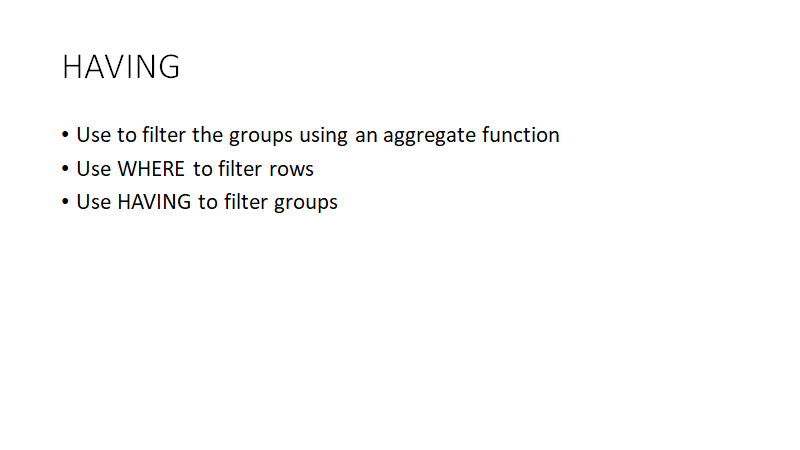

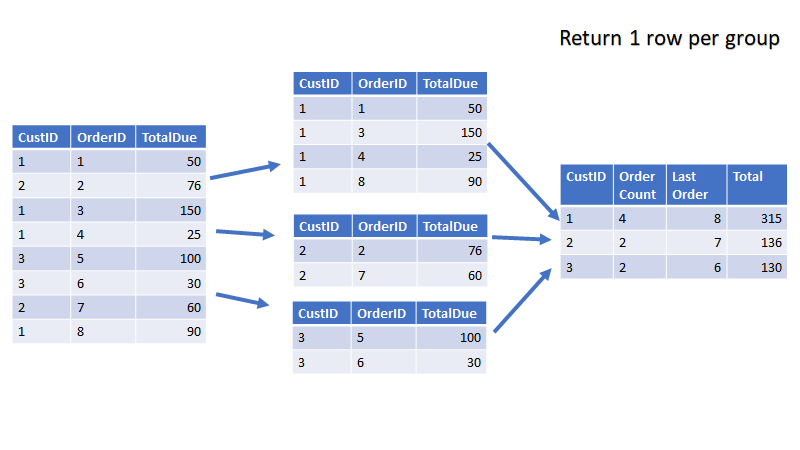

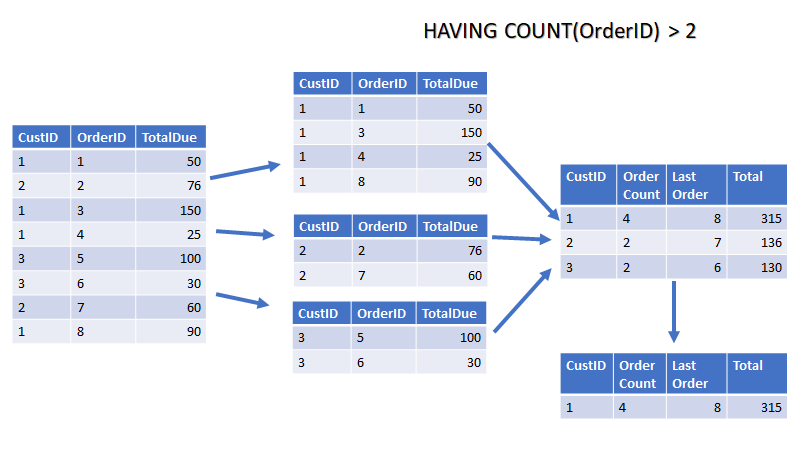

In [ ]:
--Demo 2: HAVING
--Using the WHERE Clause       
SELECT CustomerID,SUM(TotalDue) AS TotalPerCustomer    
FROM Sales.SalesOrderHeader    
WHERE TerritoryID in (5,6)    
GROUP BY CustomerID; 


In [ ]:
--Using the HAVING Clause    
SELECT CustomerID,SUM(TotalDue) AS TotalPerCustomer    
FROM Sales.SalesOrderHeader    
GROUP BY CustomerID    
HAVING SUM(TotalDue) > 5000; 

In [ ]:
SELECT CustomerID,SUM(TotalDue) AS TotalPerCustomer    
FROM Sales.SalesOrderHeader    
GROUP BY CustomerID    
HAVING COUNT(*) = 10 AND SUM(TotalDue) > 5000;      

In [ ]:
--Still works, but incorrect method    
SELECT CustomerID,SUM(TotalDue) AS TotalPerCustomer    
FROM Sales.SalesOrderHeader    
GROUP BY CustomerID    
HAVING CustomerID > 27858;   